In [492]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

In [493]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [494]:
df['Dependents']=df['Dependents'].replace(to_replace='3+',value='4')

In [495]:
df['Dependents'].unique()

array(['0', '1', '2', '4', nan], dtype=object)

In [496]:
df.shape

(614, 13)

In [497]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [498]:
df.size

7982

In [499]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [507]:
df=df.drop(columns=['Loan_ID'],axis=1)

In [508]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [509]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())


In [510]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [511]:
df['Dependents']=df['Dependents'].astype(int)

In [512]:
#converting the categorical data to numerical

df.replace({'Gender':{'Male':0,'Female':1},'Married':{'No':0,'Yes':1},'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Loan_Status':{'N':0,'Y':1}},inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,0,1,4,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

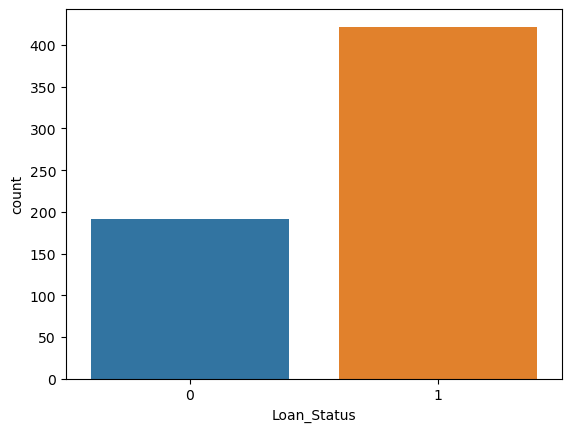

In [513]:
sns.countplot(df['Loan_Status'])

In [514]:
print(df.duplicated().sum())

0


In [515]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.364569,-0.165877,0.045364,0.000525,-0.058809,-0.082912,-0.107930,0.073567,-0.012819,0.025752,-0.017987
Married,-0.364569,1.000000,0.308408,-0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,-0.165877,0.308408,1.000000,-0.059001,0.048028,0.134080,0.034780,0.170666,-0.101674,-0.044303,-0.012006,0.002474
Education,0.045364,-0.012304,-0.059001,1.000000,0.010383,0.140760,0.062290,0.166998,0.077242,0.077936,0.065243,0.085884
Self_Employed,0.000525,0.004489,0.048028,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,-0.058809,0.051708,0.134080,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,-0.082912,0.075948,0.034780,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,-0.107930,0.147141,0.170666,0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,0.073567,-0.100863,-0.101674,0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,-0.012819,0.005852,-0.044303,0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


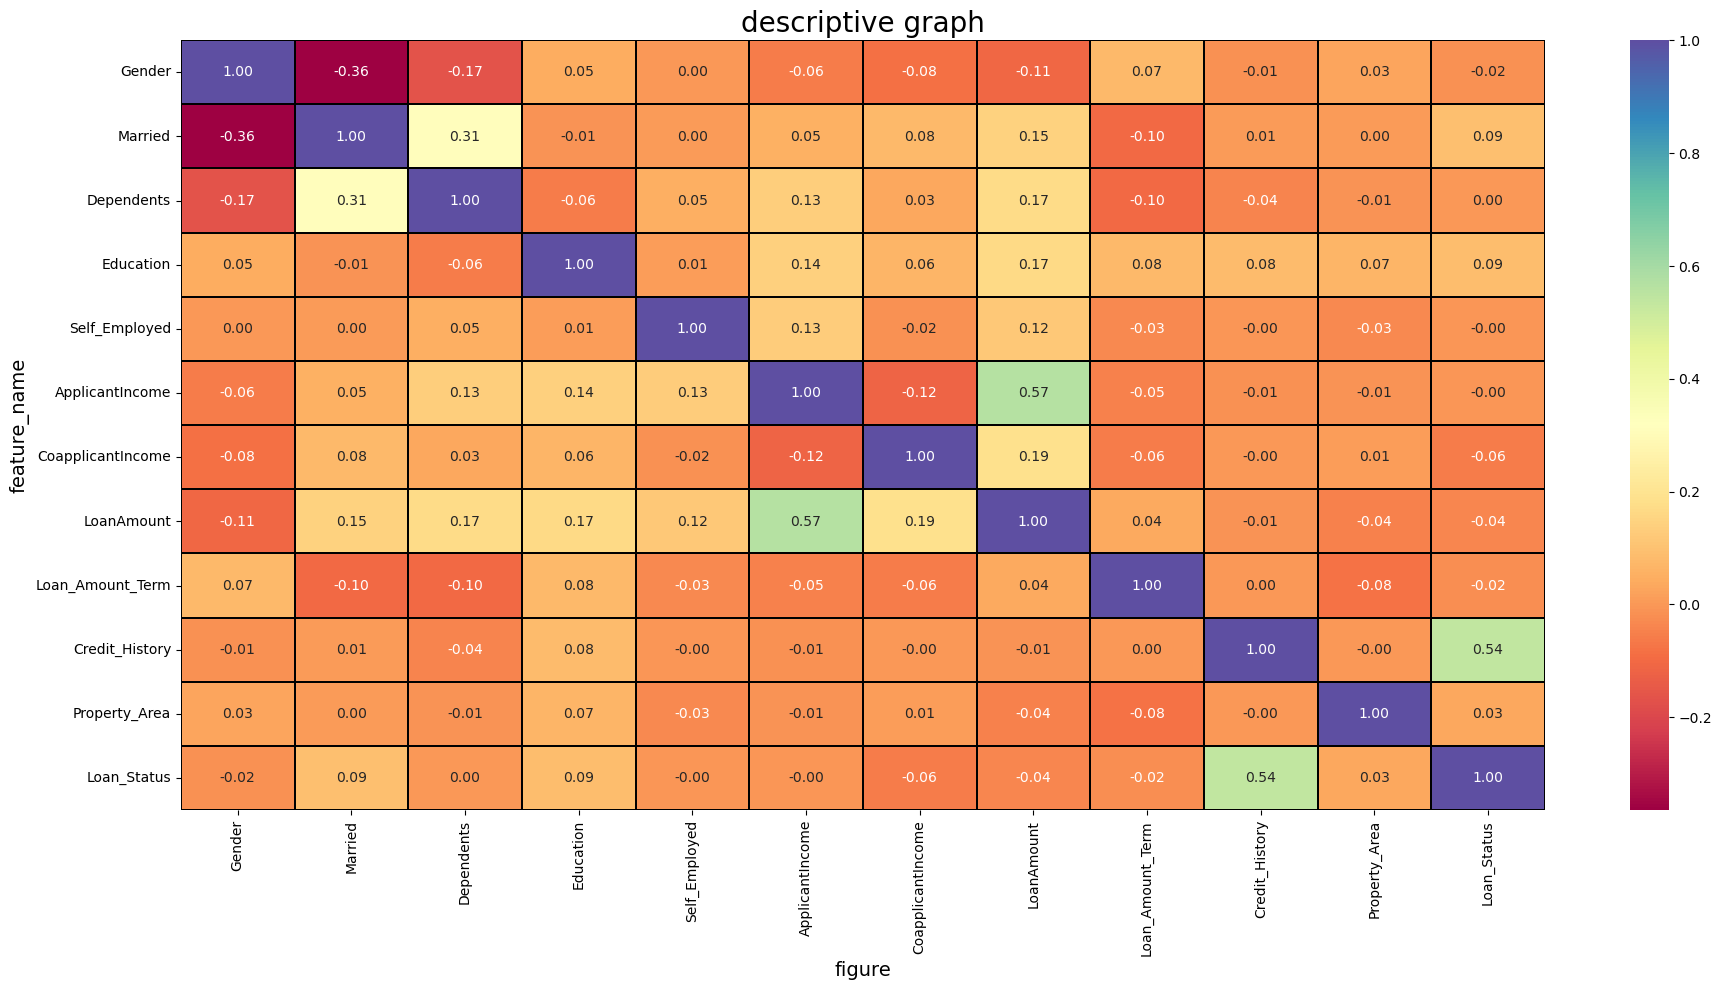

In [516]:
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('figure',fontsize=14)
plt.ylabel('feature_name',fontsize=14)
plt.title('descriptive graph',fontsize=20)
plt.show()

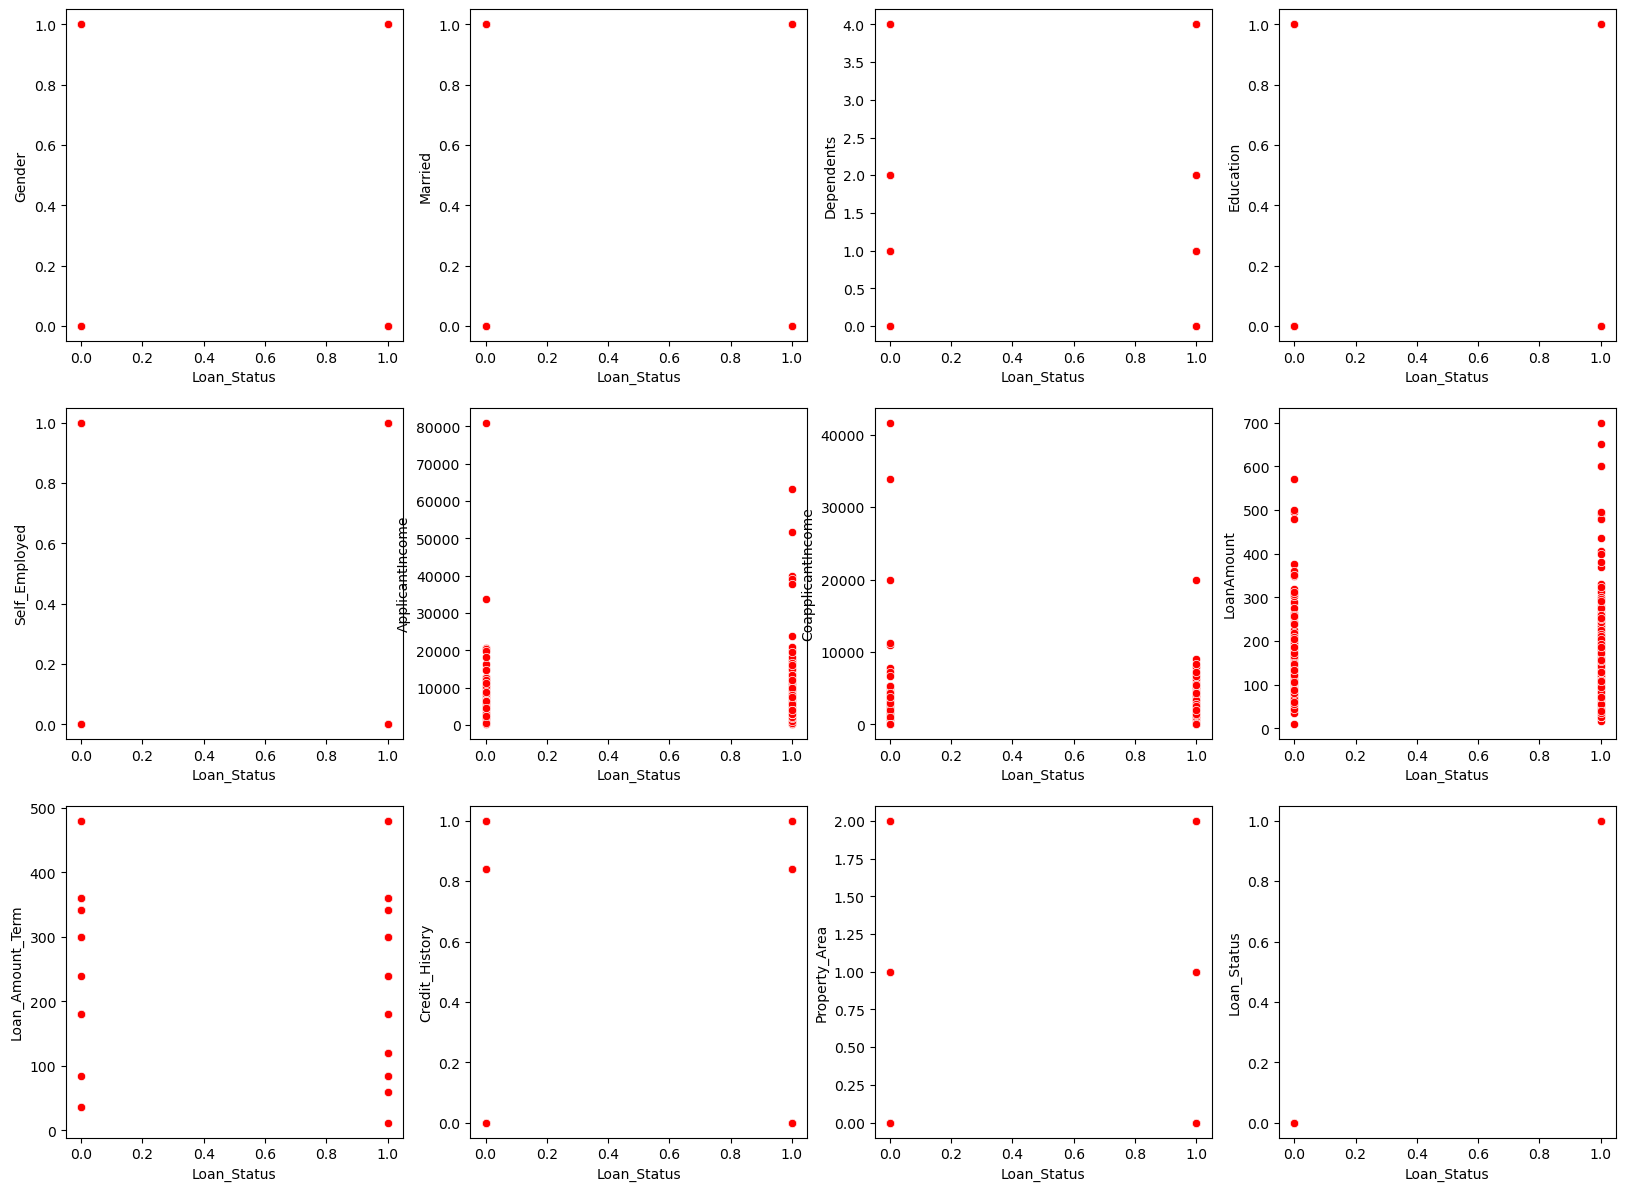

In [517]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<13:
        plt.subplot(5,4,p)
        sns.scatterplot(x="Loan_Status",y=i,data=df,color='r')
        plt.xlabel('Loan_Status')
        plt.ylabel(i)
    p+=1
    
plt.show()

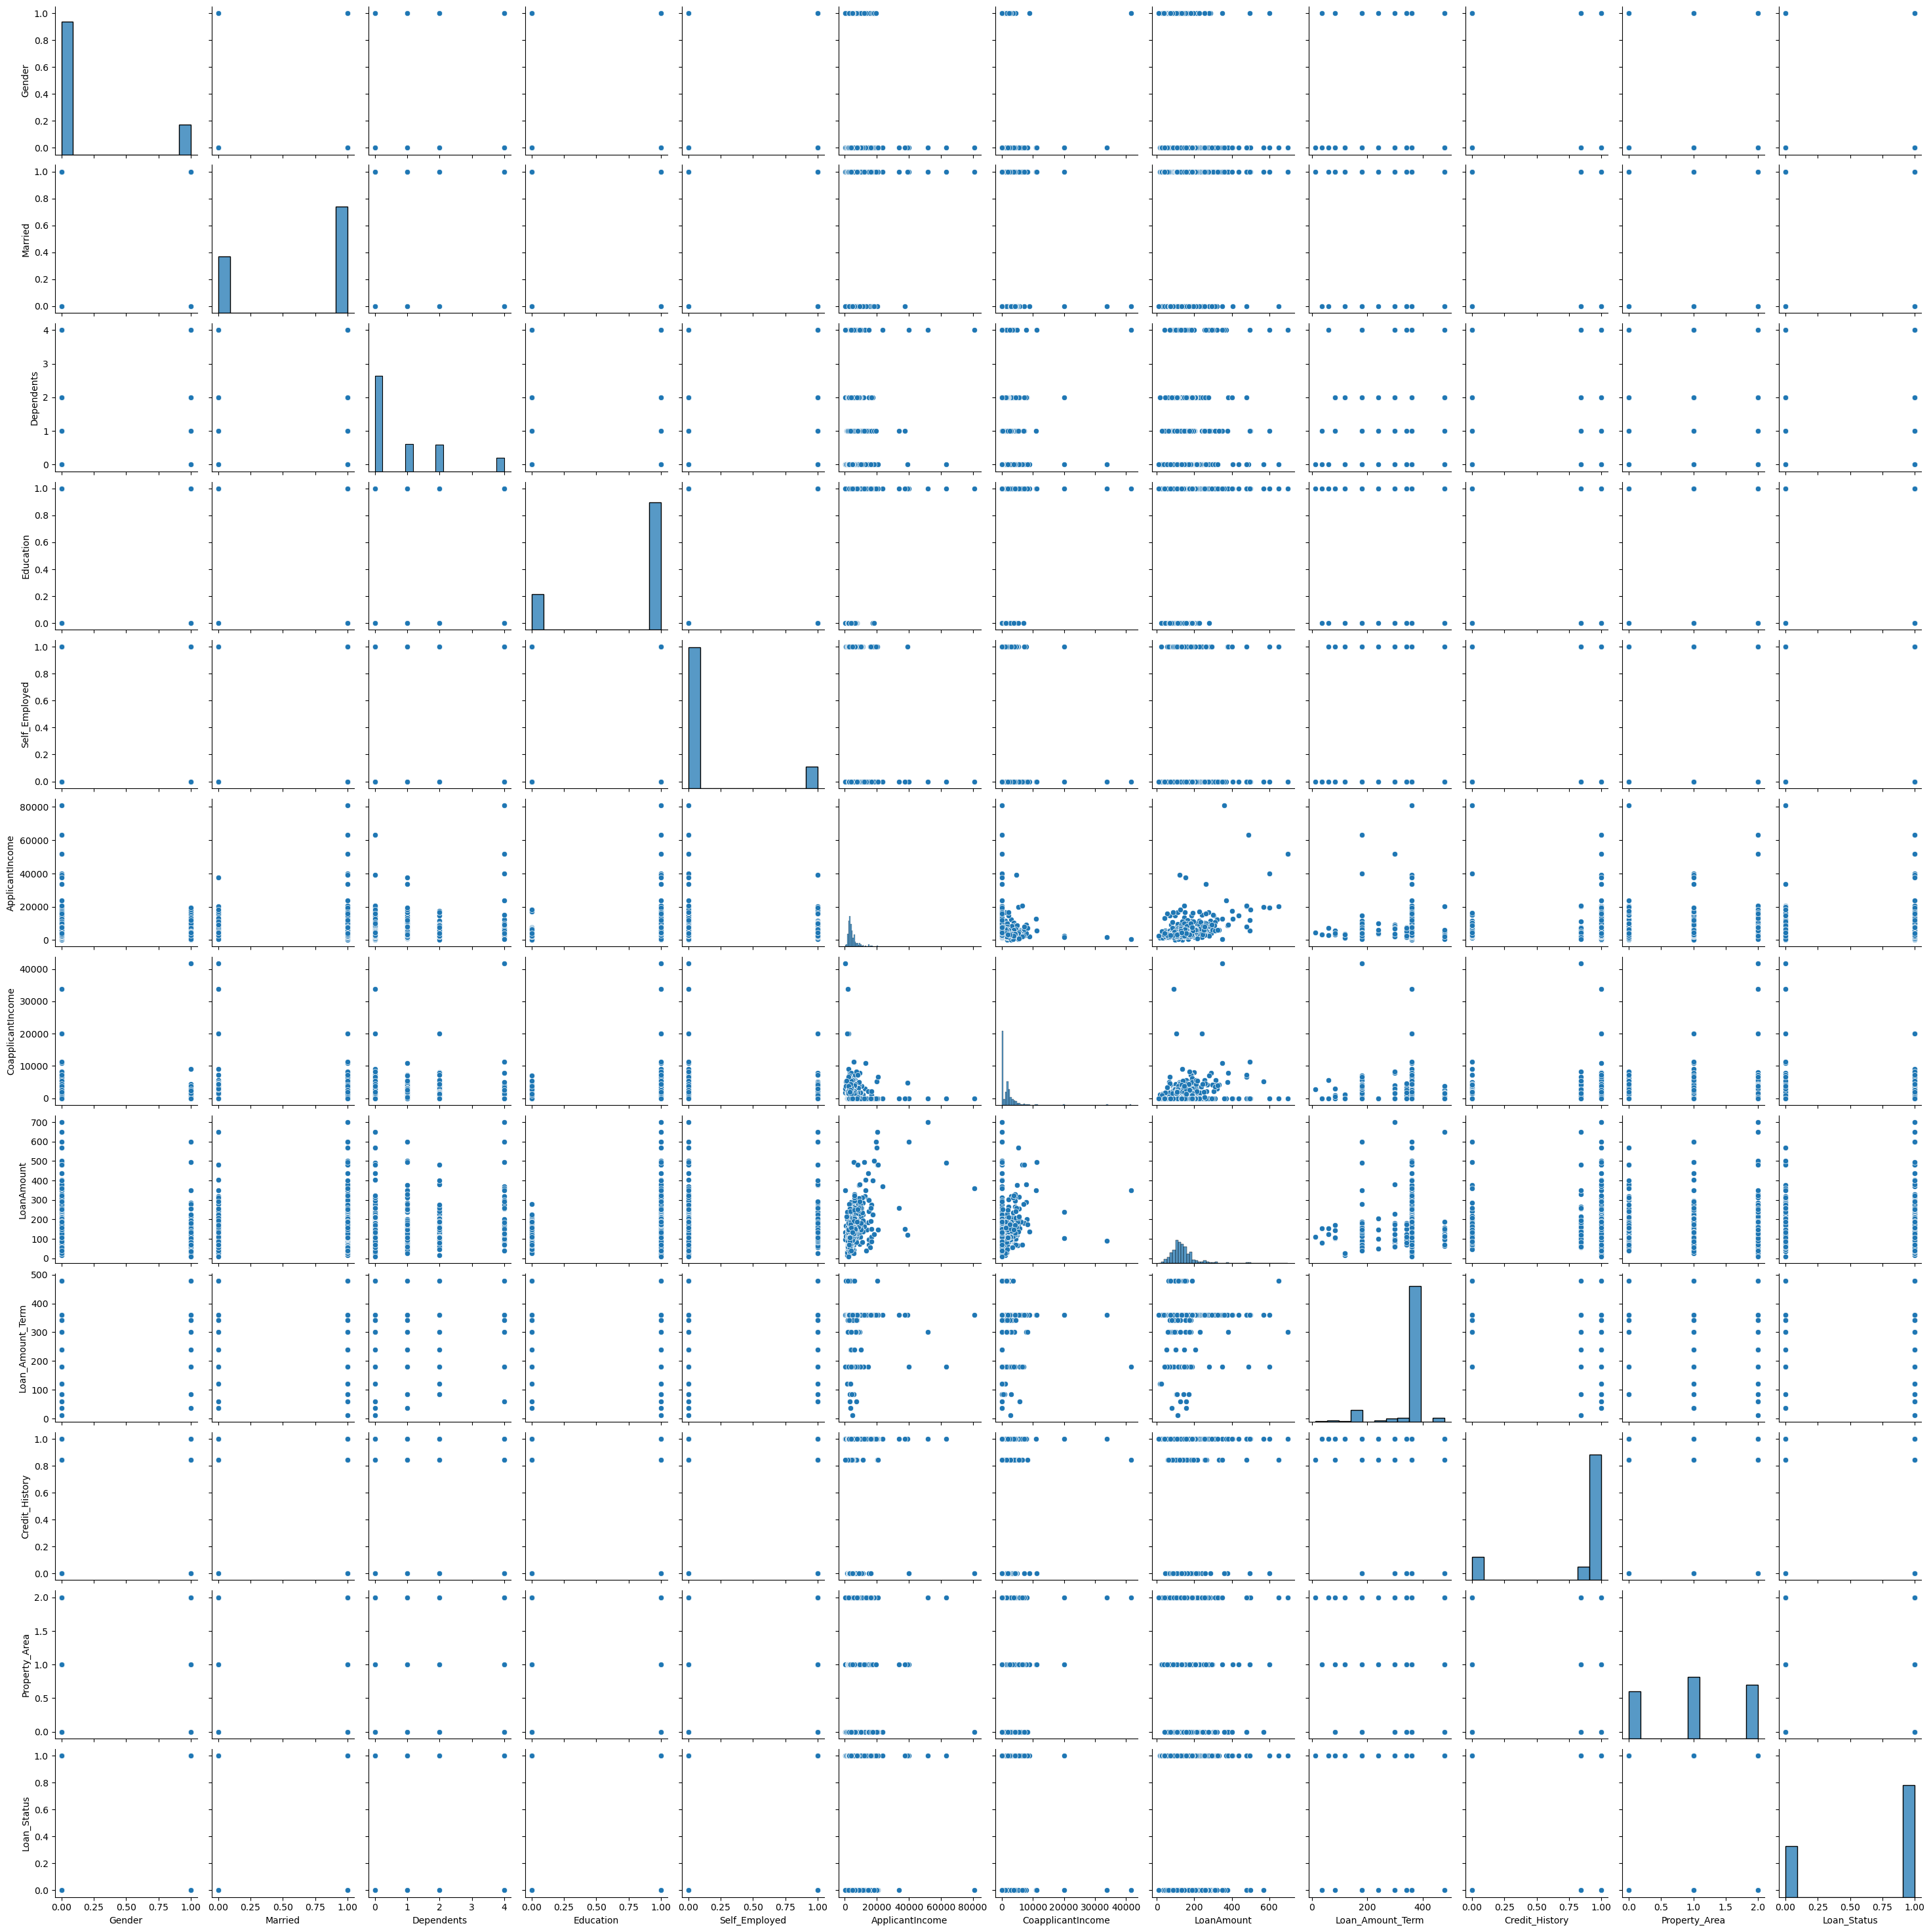

In [518]:
sns.pairplot(data=df,palette="Dark2")

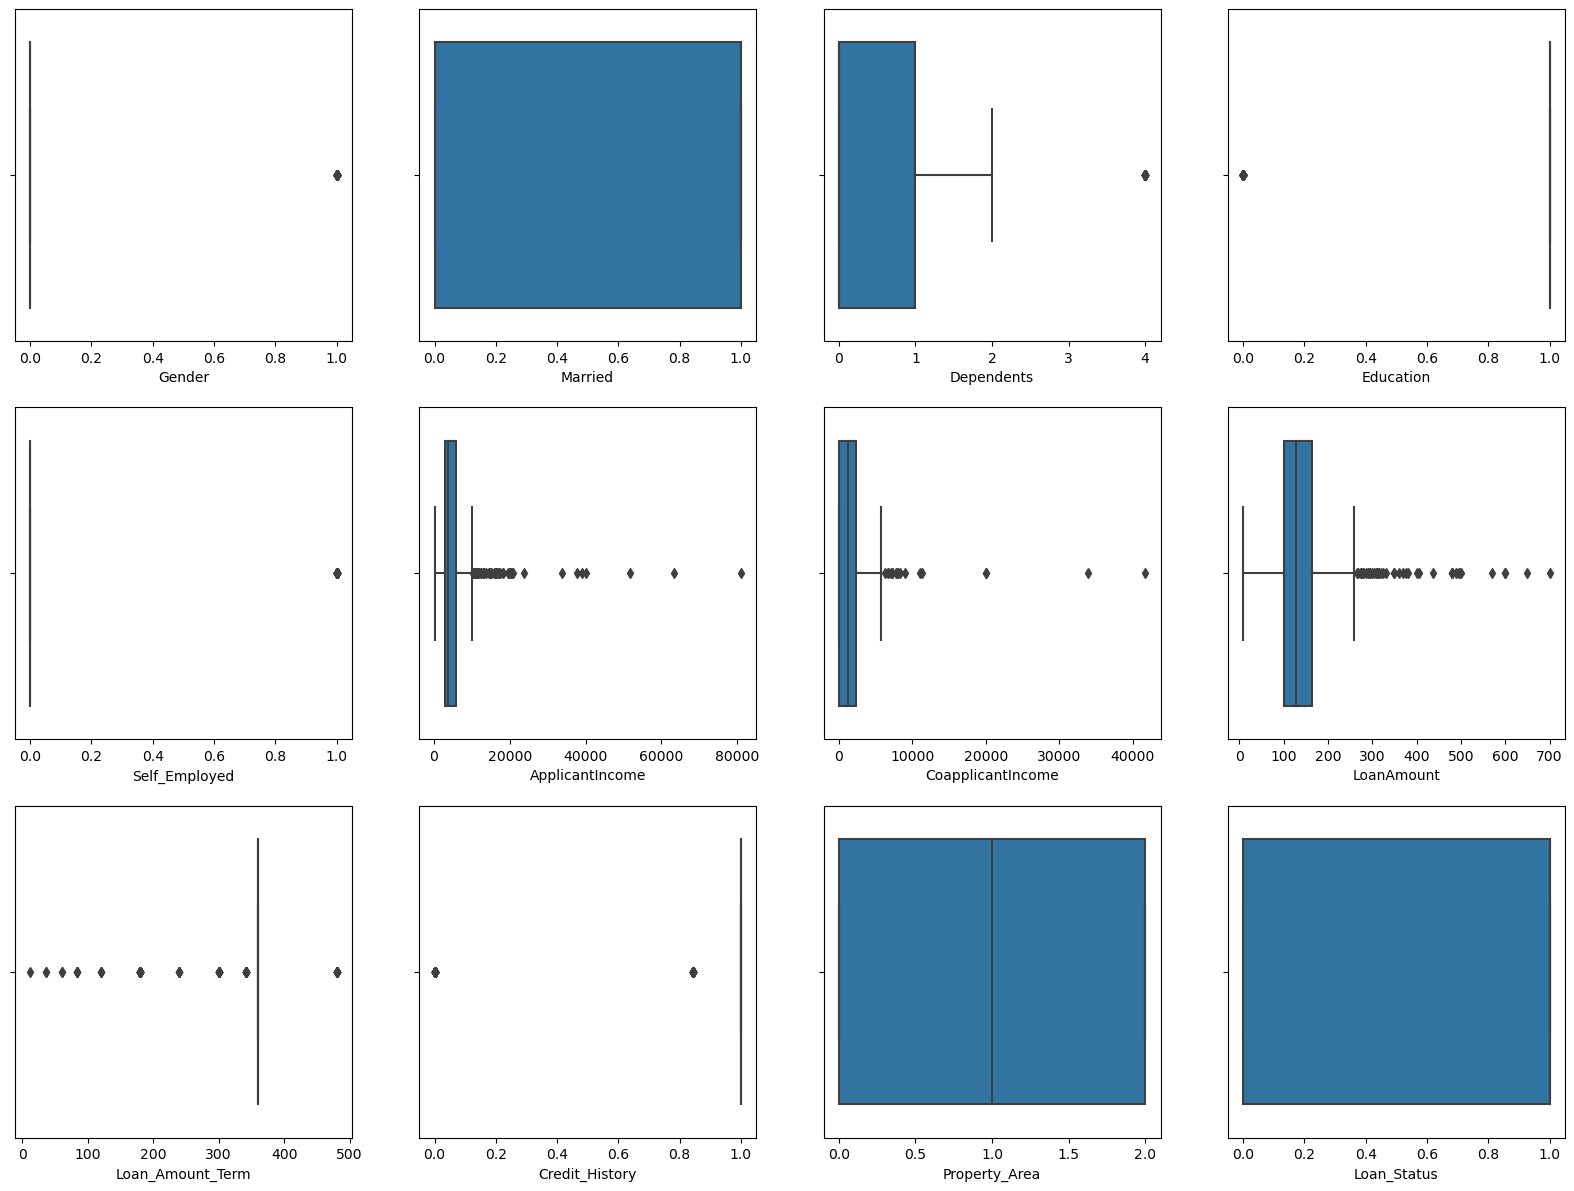

In [519]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i])
        plt.xlabel(i)
       
    p+=1
    
plt.show()

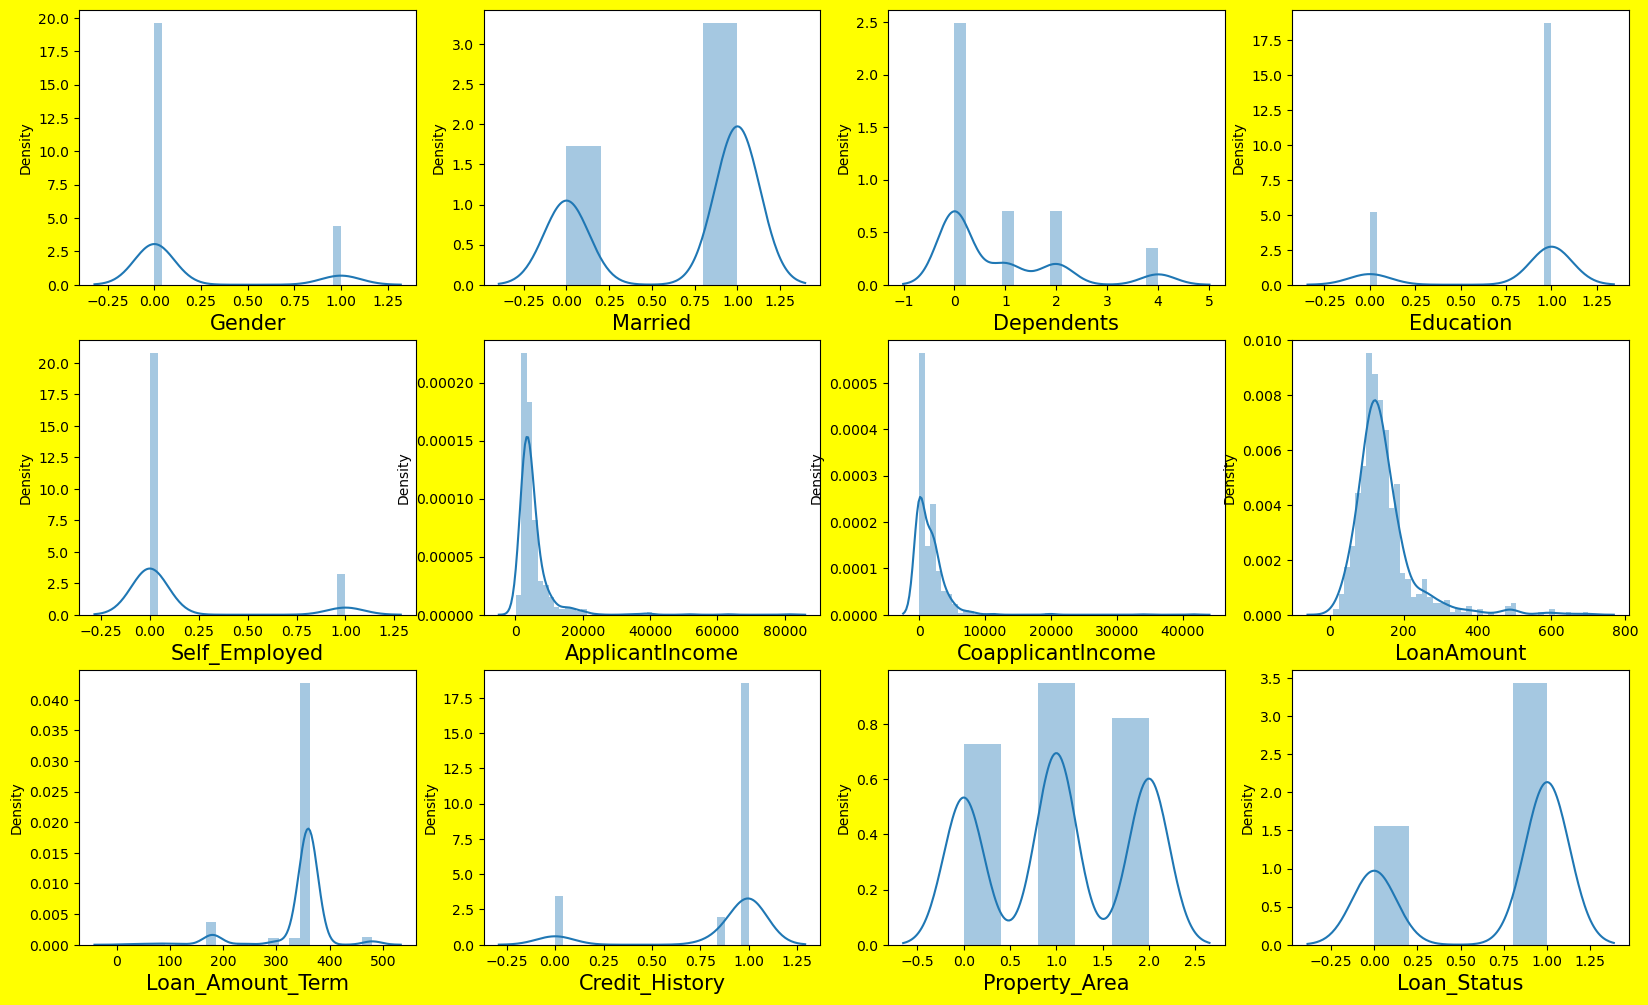

In [520]:
plt.figure(figsize=(20,25),facecolor='yellow')
graph=1

for column in df:
    if graph<=13:
        plt.subplot(6,4,graph)
        ax=sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
        
    graph+=1
plt.show()    

In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [522]:
df.skew()

Gender               1.648795
Married             -0.644850
Dependents           1.456965
Education           -1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [523]:
from scipy.stats import zscore
out_features=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
z=np.abs(zscore(out_features))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,0.554487,0.000000,0.279851,0.451640
1,0.134412,0.038732,0.219273,0.279851,0.451640
2,0.393747,0.554487,0.957641,0.279851,0.451640
3,0.462062,0.251980,0.314547,0.279851,0.451640
4,0.097728,0.554487,0.064454,0.279851,0.451640
...,...,...,...,...,...
609,0.410130,0.554487,0.898095,0.279851,0.451640
610,0.212557,0.554487,1.267279,2.518655,0.451640
611,0.437174,0.472404,1.269371,0.279851,0.451640
612,0.357064,0.554487,0.483367,0.279851,0.451640


In [524]:
#threshold=3
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604]),
 array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
        2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2]))

In [525]:
#removing the data above zscore and creating the newdf
df1=df[(z<3).all(axis=1)]


df1.shape

(577, 12)

In [526]:
print('old data shape',df.shape[0])
print("new data shape",df1.shape[0])

old data shape 614
new data shape 577


In [527]:
df1.skew()

Gender               1.622920
Married             -0.630211
Dependents           1.500252
Education           -1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [528]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,0,1,4,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


In [529]:
x=df1.drop(columns='Loan_Status',axis=1)
y=df1['Loan_Status']

In [530]:
x.shape

(577, 11)

In [531]:
y.shape

(577,)

In [532]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df1=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-0.477137,-1.362511,-0.670628,0.541961,-0.380580,0.399266,-0.861036,0.184585,0.239408,0.456461,1.227472
1,-0.477137,0.733939,0.172406,0.541961,-0.380580,-0.028020,0.052840,-0.143355,0.239408,0.456461,-1.306522
2,-0.477137,0.733939,-0.670628,0.541961,2.627567,-0.562297,-0.861036,-1.247642,0.239408,0.456461,1.227472
3,-0.477137,0.733939,-0.670628,-1.845150,-0.380580,-0.703039,0.567956,-0.285844,0.239408,0.456461,1.227472
4,-0.477137,-1.362511,-0.670628,0.541961,-0.380580,0.450230,-0.861036,0.088189,0.239408,0.456461,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,2.095835,-1.362511,-0.670628,0.541961,-0.380580,-0.596048,-0.861036,-1.158587,0.239408,0.456461,-1.306522
573,-0.477137,0.733939,2.701508,0.541961,-0.380580,-0.189012,-0.861036,-1.710730,-3.237229,0.456461,-1.306522
574,-0.477137,0.733939,0.172406,0.541961,-0.380580,1.149549,-0.715592,2.083030,0.239408,0.456461,1.227472
575,-0.477137,0.733939,1.015440,0.541961,-0.380580,0.984507,-0.861036,0.907499,0.239408,0.456461,1.227472


In [533]:
from imblearn.over_sampling import SMOTE

x_res,y_res=SMOTE().fit_resample(x,y)

y_res.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

In [534]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=.20,random_state=42)

In [535]:
print(y.shape,y_train.shape,y_test.shape)

(577,) (636,) (160,)


In [536]:
print(x.shape,x_train.shape,x_test.shape)

(577, 11) (636, 11) (160, 11)


In [537]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

print(accuracy_score(y_test,pred))


0.76875


In [538]:
print(confusion_matrix(y_test,pred))

[[61 21]
 [16 62]]


In [539]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77        82
           1       0.75      0.79      0.77        78

    accuracy                           0.77       160
   macro avg       0.77      0.77      0.77       160
weighted avg       0.77      0.77      0.77       160



In [540]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [541]:
dtc=DecisionTreeClassifier()
sv=SVC()
knn=KNeighborsClassifier()

RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()




model=[dtc,sv,knn,RFC,GBC]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    
    print('\n')

accuracy score of DecisionTreeClassifier() is:
0.8
[[66 16]
 [16 62]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        82
           1       0.79      0.79      0.79        78

    accuracy                           0.80       160
   macro avg       0.80      0.80      0.80       160
weighted avg       0.80      0.80      0.80       160



accuracy score of SVC() is:
0.5375
[[48 34]
 [40 38]]
              precision    recall  f1-score   support

           0       0.55      0.59      0.56        82
           1       0.53      0.49      0.51        78

    accuracy                           0.54       160
   macro avg       0.54      0.54      0.54       160
weighted avg       0.54      0.54      0.54       160



accuracy score of KNeighborsClassifier() is:
0.66875
[[59 23]
 [30 48]]
              precision    recall  f1-score   support

           0       0.66      0.72      0.69        82
           1       0.68      0.62    

In [542]:
import joblib

#from sklearn.externals import joblib
#save the model as a object file

joblib.dump(RFC,'RFCfile.obj')
#load the model from file

MODEL=joblib.load('RFCfile.obj')

#use the loaded model to make predictions

MODEL.predict(x_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1])

In [543]:
conclusion=pd.DataFrame([MODEL.predict(x_test)[:],y_test[:]],index=['predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
predicted,0,0,1,0,0,0,0,0,0,0,...,1,1,1,1,1,0,1,0,1,1
original,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,0,1,0,1,1


In [544]:
result=MODEL.score(x_test,y_test)
print(result*100)

83.125


# QUESTION 2

In [395]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/global_Power_plant_database.csv")
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [396]:
data['country'].nunique()

1

In [397]:
#setting date as index
data.set_index('gppd_idnr',inplace=True)

In [398]:
data.shape

(908, 24)

In [399]:
data.columns

Index(['country', 'country_long', 'name', 'capacity_mw', 'latitude',
       'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [400]:
data.isna().sum()

country                       0
country_long                  0
name                          0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

x=data.drop('primary_fuel',axis=1)
y=data.primary_fuel

from sklearn.feature_selection import f_classif,selectKBest

best_feature=SelectBest(score_fun=f_classif,k=24)
fit=best_feature.fit(x,y)
df_score=pd.DataFrame(fit.score_)
df_columns=pd.DataFrame(x.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','score']

print(feature_scores.nlargest(24,'score'))

In [401]:
data.drop(columns=['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel2','other_fuel1','country','country_long','name','url','source','generation_data_source'],axis=1,inplace=True)
data

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
gppd_idnr,,,,,,,,,,,,,
WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,WRI,NaN,NaN,NaN,NaN,NaN,NaN
IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,NaN,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000
WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN


In [402]:
data.isna().sum()

capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
owner                    566
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2013      524
generation_gwh_2014      507
generation_gwh_2015      483
generation_gwh_2016      471
generation_gwh_2017      465
dtype: int64

In [403]:
data['latitude']=data['latitude'].fillna(data['latitude'].mean())
data['longitude']=data['longitude'].fillna(data['longitude'].mean())
data['commissioning_year']=data['commissioning_year'].fillna(data['commissioning_year'].mode()[0])
data['owner']=data['owner'].fillna(data['owner'].mode()[0])
data['geolocation_source']=data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])
data['year_of_capacity_data']=data['year_of_capacity_data'].fillna(data['year_of_capacity_data'].mode()[0])
data['generation_gwh_2013']=data['generation_gwh_2013'].fillna(data['generation_gwh_2013'].mean())
data['generation_gwh_2014']=data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mean())
data['generation_gwh_2015']=data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mean())
data['generation_gwh_2016']=data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mean())
data['generation_gwh_2017']=data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mean())
data['generation_data_source']=data['generation_data_source'].fillna(data['generation_data_source'].mode()[0])

KeyError: 'generation_data_source'

In [404]:
data.isna().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
owner                    0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2013      0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
dtype: int64

In [405]:
best_feature=SelectBest(score_fun=f_classif,k=)
fit=best_feature.fit(x,y)
df_score=pd.DataFrame(fit.score_)
df_columns=pd.DataFrame(x.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','score']

print(feature_scores.nlargest(,'score'))

SyntaxError: invalid syntax (3676134761.py, line 1)

In [406]:
data.dtypes

capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel              object
commissioning_year       float64
owner                     object
geolocation_source        object
year_of_capacity_data    float64
generation_gwh_2013      float64
generation_gwh_2014      float64
generation_gwh_2015      float64
generation_gwh_2016      float64
generation_gwh_2017      float64
dtype: object

In [408]:
#checking the value counts of each column
for i in data.columns:
    print(data[i].value_counts())
    print("\n")

5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
645.0      1
41.4       1
17.5       1
445.0      1
106.6      1
Name: capacity_mw, Length: 365, dtype: int64


21.196189    46
19.000400     3
24.191700     3
31.268000     2
14.235200     2
             ..
22.755400     1
27.159800     1
17.297000     1
20.877200     1
9.934400      1
Name: latitude, Length: 838, dtype: int64


77.447848    46
71.691700     4
71.691800     3
72.898300     3
81.287500     3
             ..
72.762900     1
70.396100     1
74.239300     1
77.043500     1
77.476800     1
Name: longitude, Length: 829, dtype: int64


Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64


2013.0    408
2015.0     26
2012.0     23
2016.0     21
2010.0     17
         ... 
1946.0      1
1956.0      1
1937.0      1
1959.0      1
1953.0      1
Name: commissioning_year, Length: 73, dtype: int64


Acc Acc

In [409]:
#checking the value counts of each column
for i in data.columns:
    print(data[i].nunique())
    print("\n")

365


838


829


8


73


280


3


1


365


375


399


406


411




In [410]:
data['primary_fuel'].nunique()

8

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

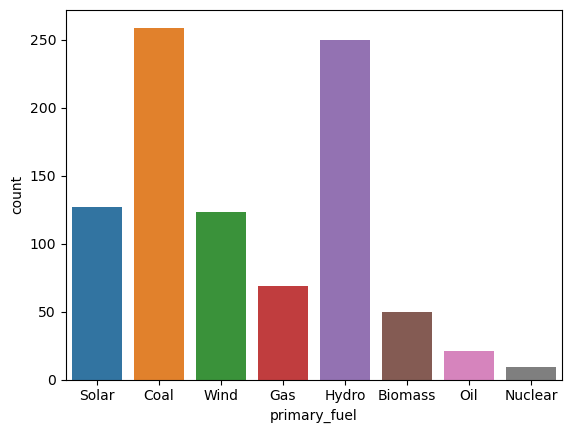

In [411]:
sns.countplot(x='primary_fuel',data=data)

In [412]:
#checking the no. of unique value in each column
data.nunique().to_frame("no. of unique values")

,no. of unique values
capacity_mw,365
latitude,838
longitude,829
primary_fuel,8
commissioning_year,73
owner,280
geolocation_source,3
year_of_capacity_data,1
generation_gwh_2013,365
generation_gwh_2014,375


In [413]:
print(data.duplicated().sum())

0


In [414]:
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.0,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.447848,2003.624449,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.088110,4.781201,15.238021,0.0,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,1997.000000,2018.0,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,60.000000,21.278850,76.978950,2013.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,388.125000,25.183775,79.211600,2013.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


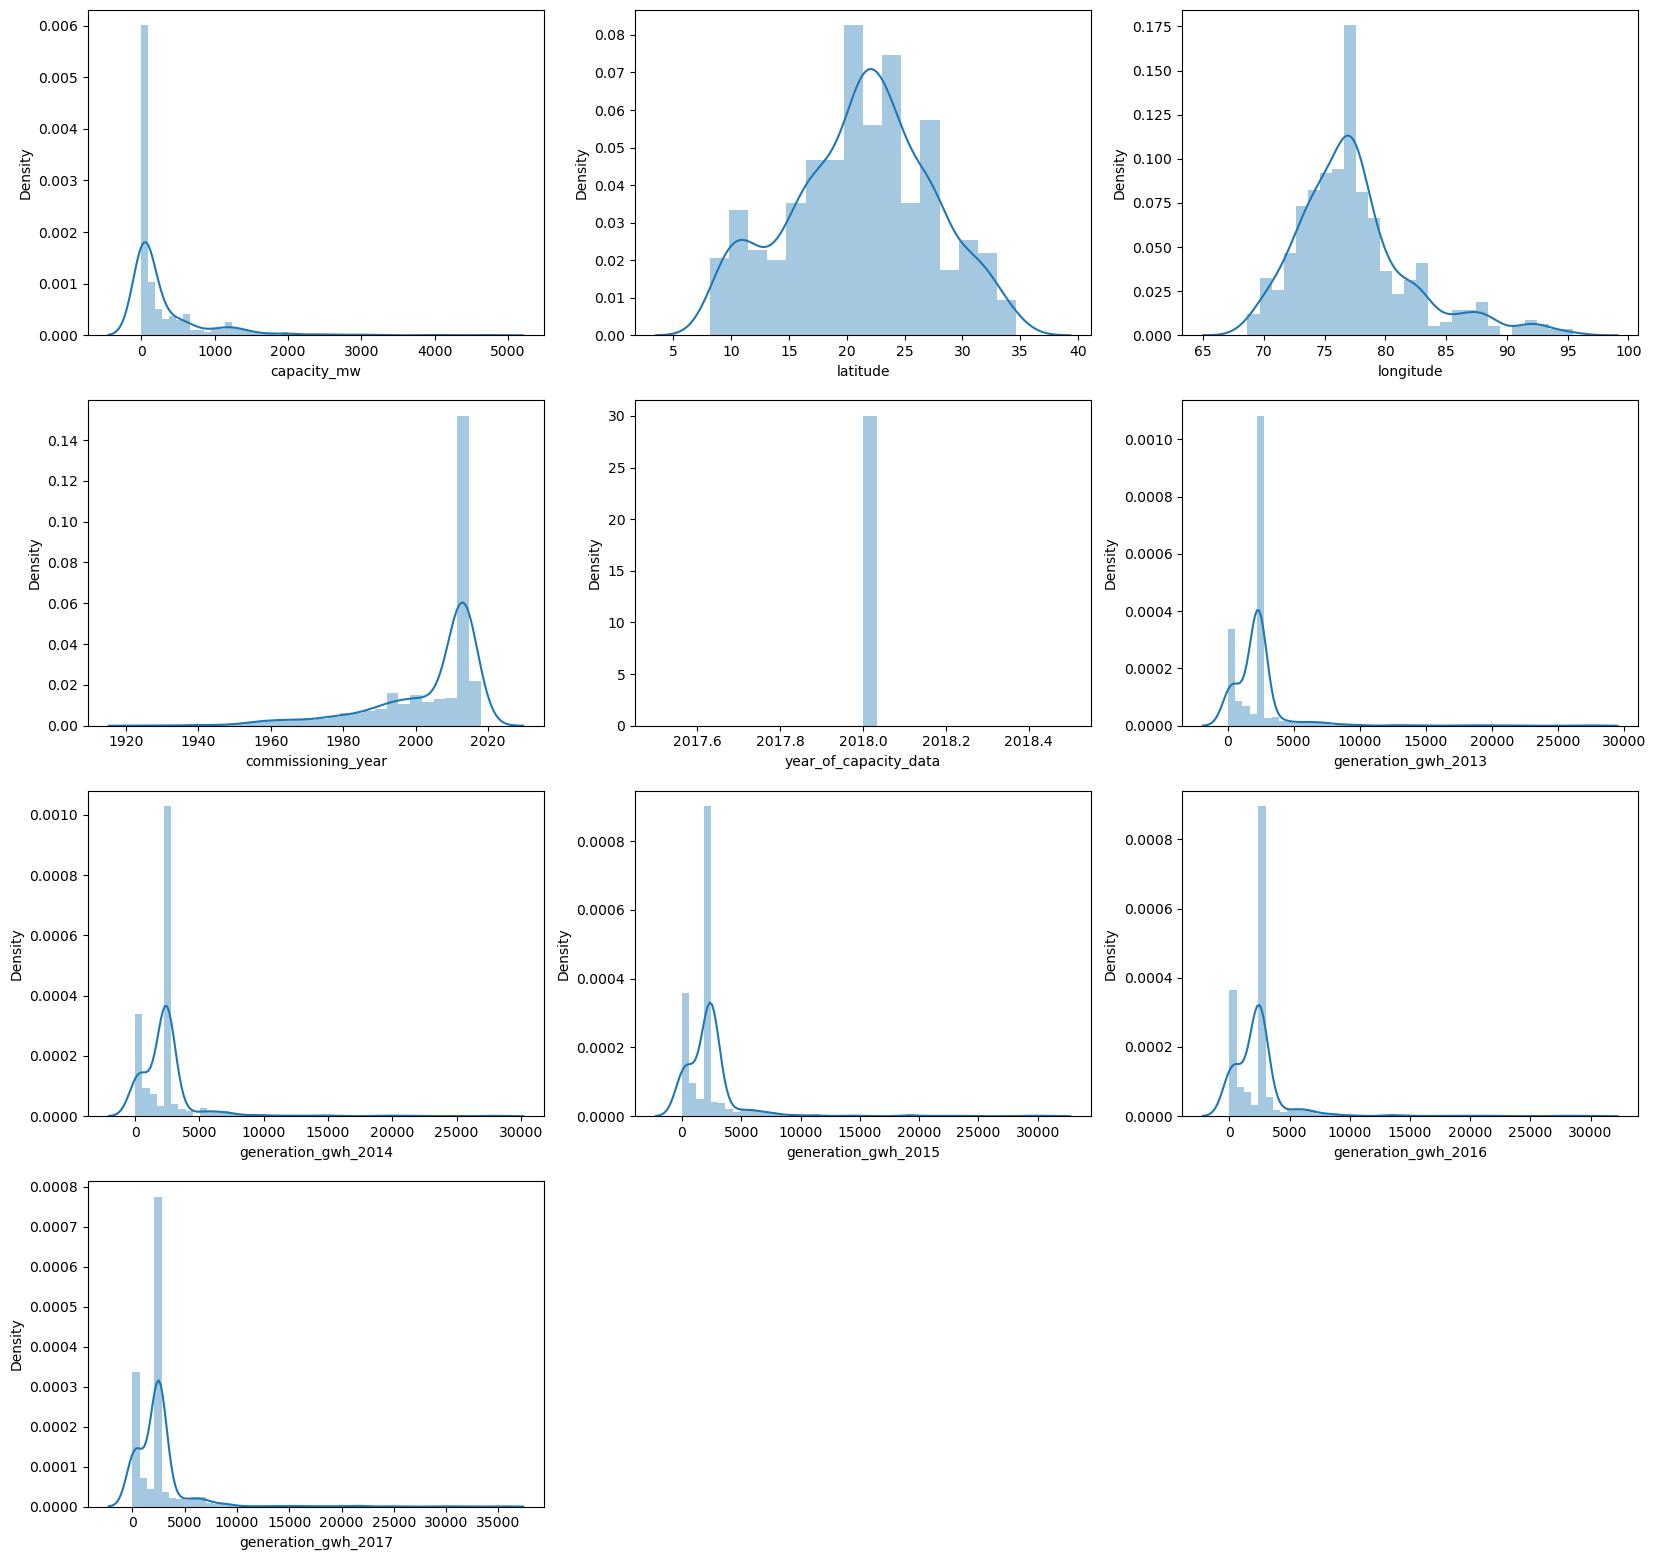

In [415]:
#plot a univariate distribution of continues observations
continuous_feature=['capacity_mw','latitude','longitude','commissioning_year','year_of_capacity_data','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for i in continuous_feature:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(data[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()


In [416]:
data.skew()

capacity_mw              3.193257
latitude                -0.147391
longitude                1.129836
commissioning_year      -1.779021
year_of_capacity_data    0.000000
generation_gwh_2013      5.241491
generation_gwh_2014      5.041961
generation_gwh_2015      5.367370
generation_gwh_2016      5.071758
generation_gwh_2017      5.111938
dtype: float64

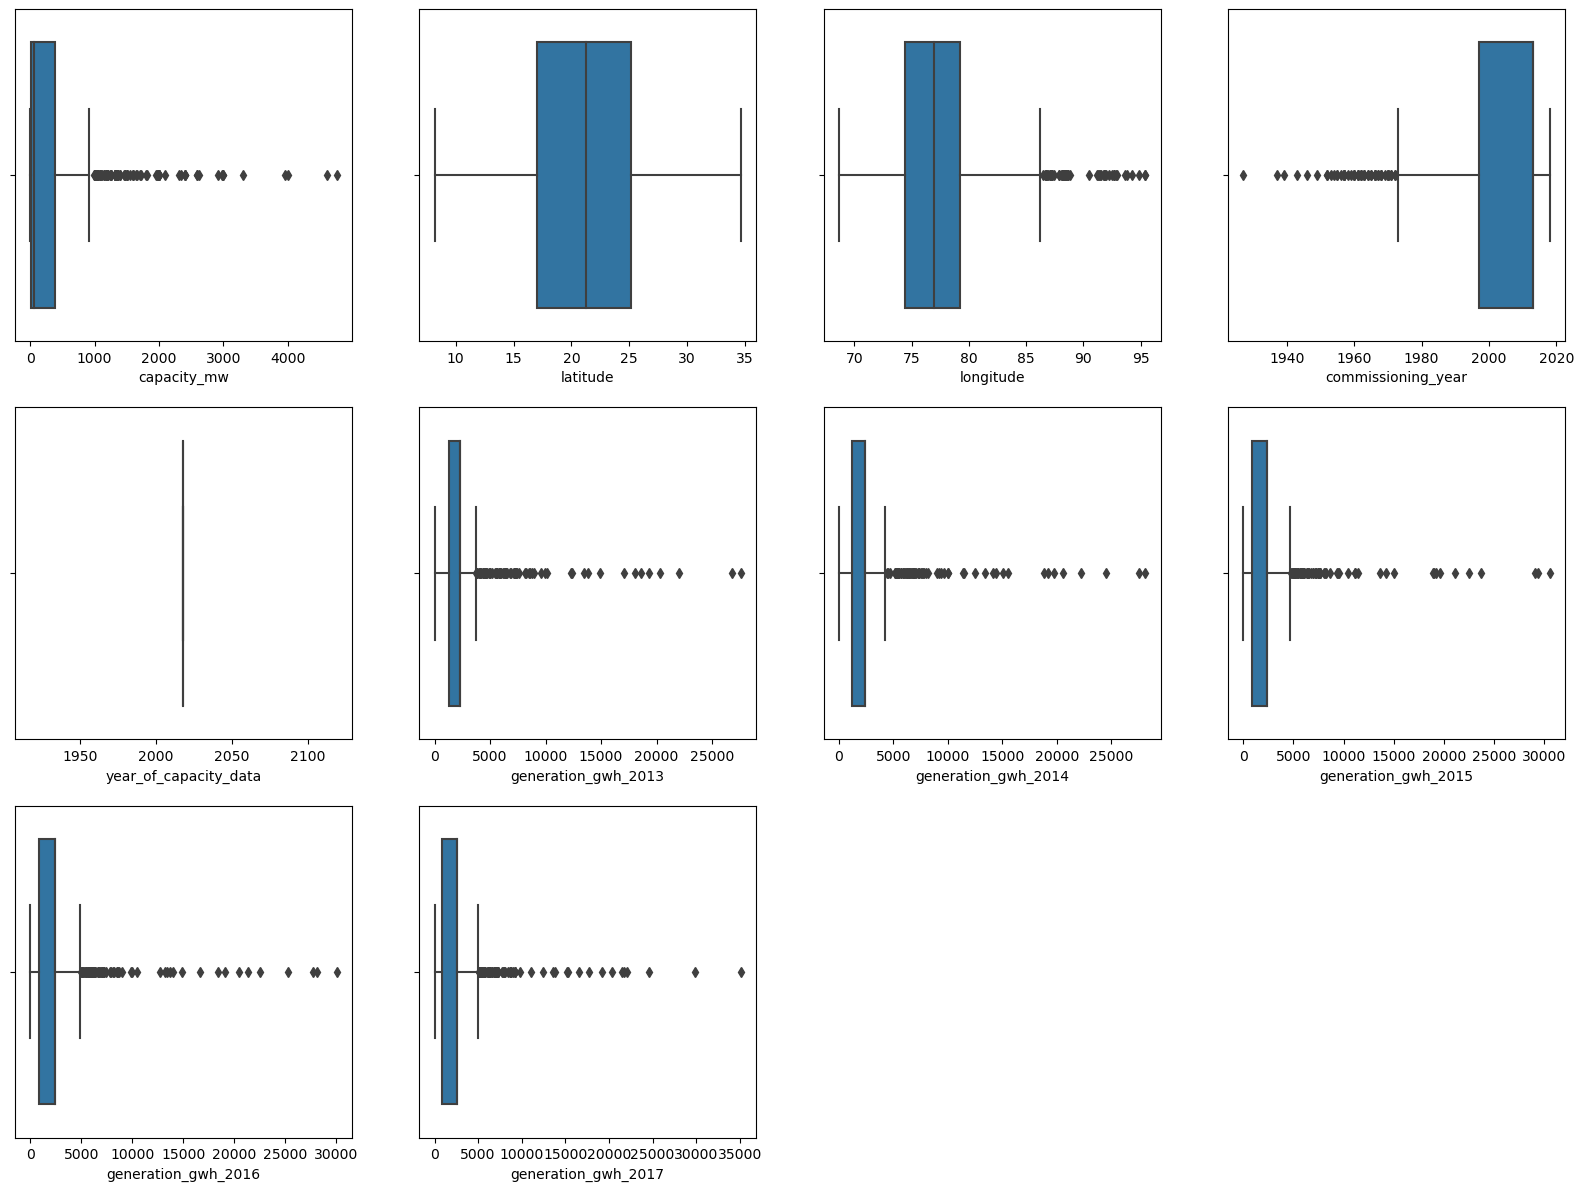

In [418]:
continuous_feature=['capacity_mw','latitude','longitude','commissioning_year','year_of_capacity_data','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']


plt.figure(figsize=(20,25))
p=1
for i in continuous_feature:
    if p<20:
        plt.subplot(5,4,p)
        sns.boxplot(data[i])
        plt.xlabel(i)
       
    p+=1
    
plt.show()

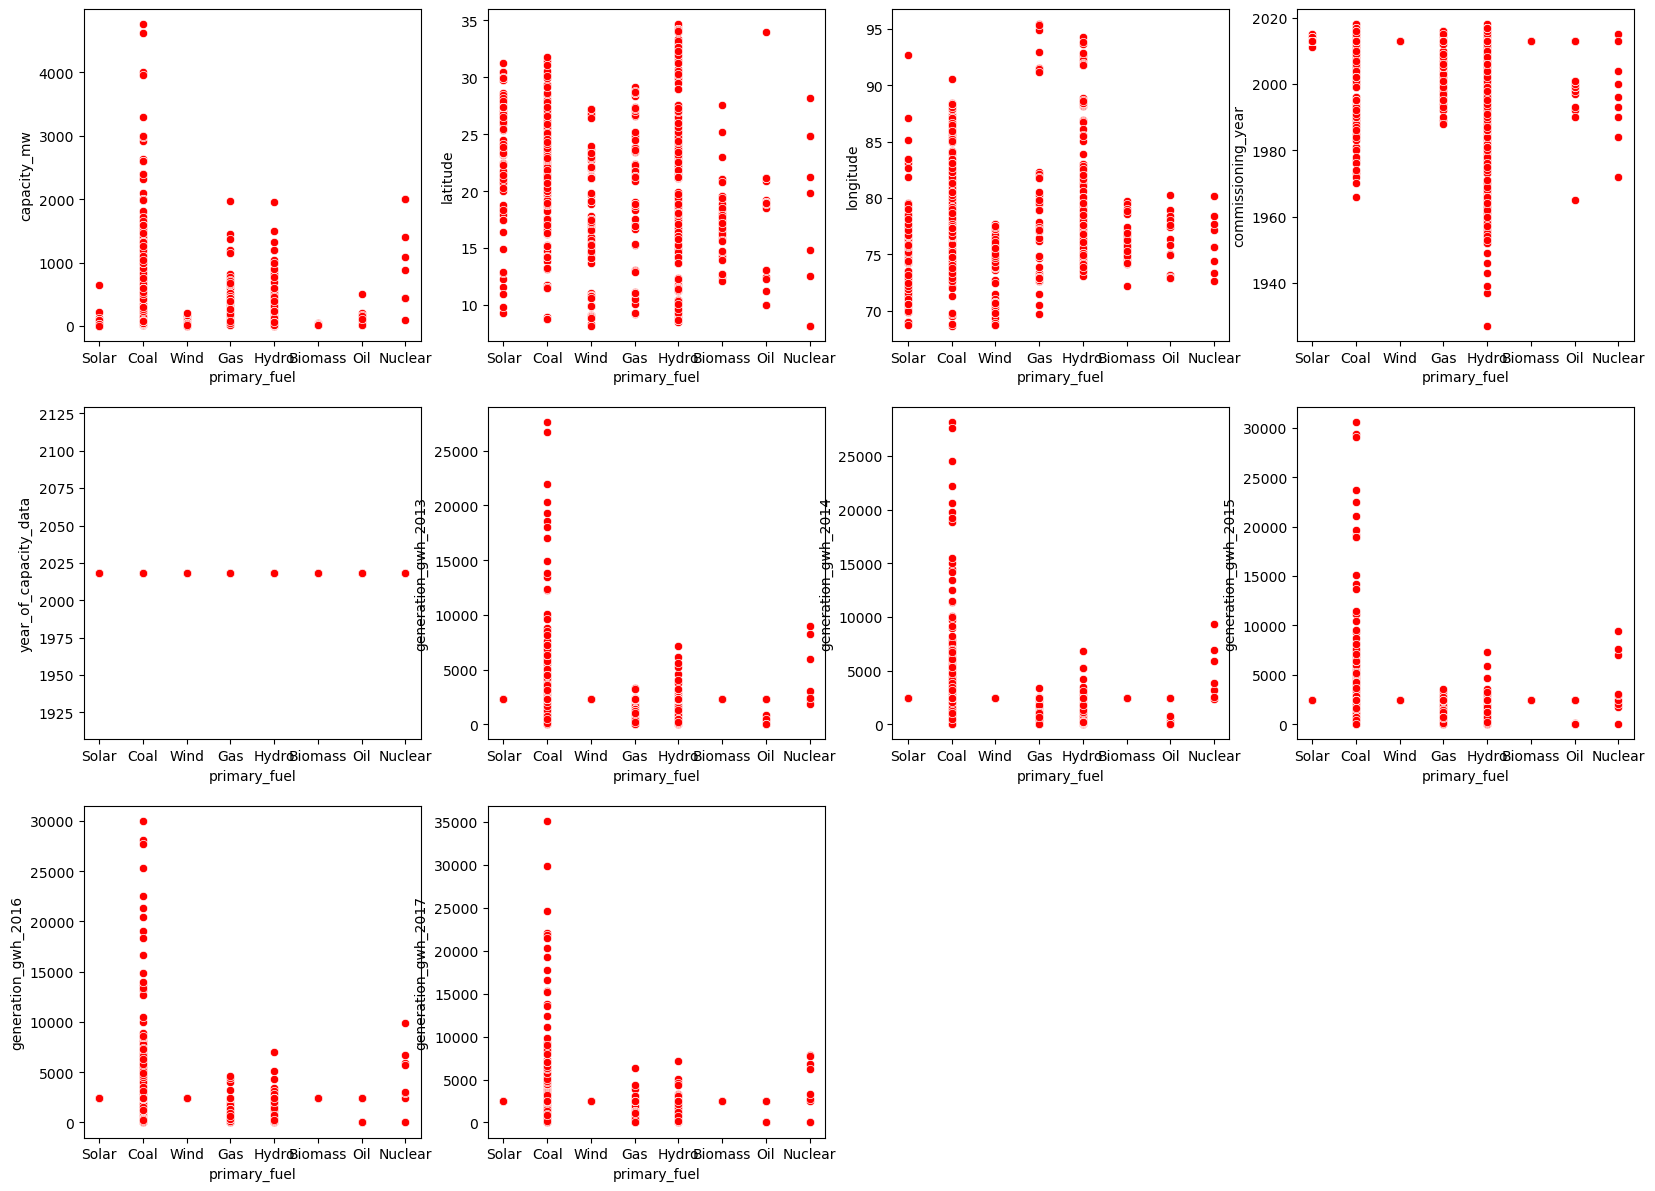

In [419]:

continuous_feature=['capacity_mw','latitude','longitude','commissioning_year','year_of_capacity_data','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']

plt.figure(figsize=(20,25))
p=1
for i in continuous_feature:
    if p<20:
        plt.subplot(5,4,p)
        sns.scatterplot(x="primary_fuel",y=i,data=data,color='r')
        plt.xlabel('primary_fuel')
        plt.ylabel(i)
    p+=1
    
plt.show()

In [420]:
one_hot = pd.get_dummies(data1['job'])
df1 = df1.drop('job',axis = 1)
df1 = df1.join(one_hot)
df1= df1.drop('unknown',axis = 1)
df1.head()


NameError: name 'data1' is not defined

In [ ]:
# all the above column have some outliers
from scipy.stats import zscore
out_features=data[['capacity_mw','longitude','commissioning_year','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]
z=np.abs(zscore(out_features))
z

In [421]:
#threshold=3
np.where(z>3)

(array([ 15,  15,  15,  15, 144, 144, 144, 144, 144, 144, 159, 159, 180,
        184, 210, 210, 210, 210, 210, 210, 222, 240, 245, 309, 309, 309,
        309, 309, 309, 324, 334, 341, 343, 361, 364, 365, 365, 365, 365,
        365, 365, 372, 376, 389, 417, 428, 445, 455, 479, 483, 485, 494,
        494, 494, 494, 494, 494, 495, 495, 495, 495, 495, 495, 500, 520,
        530, 533, 539, 542, 547, 575, 584, 602, 622, 639, 649, 649, 649,
        649, 649, 649, 658, 658, 658, 658, 658, 658, 696, 696, 696, 696,
        696, 707, 710, 722, 722, 722, 722, 725, 725, 725, 725, 725, 727,
        727, 727, 727, 727, 727, 729, 787, 787, 787, 787, 787, 787, 789,
        808, 809, 809, 809, 809, 809, 819, 848, 849, 849, 881, 881, 881,
        881, 881, 881]),
 array([0, 5, 6, 7, 0, 3, 4, 5, 6, 7, 3, 4, 1, 1, 0, 3, 4, 5, 6, 7, 2, 1,
        1, 0, 3, 4, 5, 6, 7, 1, 1, 1, 2, 1, 0, 0, 3, 4, 5, 6, 7, 2, 0, 1,
        1, 1, 2, 2, 2, 0, 2, 0, 3, 4, 5, 6, 7, 0, 3, 4, 5, 6, 7, 1, 1, 1,
        3, 2, 2, 1, 2, 

In [422]:
#removing the data above zscore and creating the newdf
df2=data[(z<3).all(axis=1)]


df2.shape

(850, 13)

In [423]:
print('old data shape',data.shape[0])
print("new data shape",df2.shape[0])

old data shape 908
new data shape 850


In [424]:
df2.skew()

capacity_mw              1.986878
latitude                -0.107673
longitude                0.868587
commissioning_year      -1.616272
year_of_capacity_data    0.000000
generation_gwh_2013      1.547085
generation_gwh_2014      1.455721
generation_gwh_2015      1.335529
generation_gwh_2016      1.359881
generation_gwh_2017      1.254465
dtype: float64

In [425]:
df2

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
gppd_idnr,,,,,,,,,,,,,
WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
WRI1019881,98.0,24.7663,74.6090,Coal,2013.0,Ultratech Cement ltd,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
WRI1026669,39.2,21.9038,69.3732,Wind,2013.0,AES,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Acc Acc ltd,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Acc Acc ltd,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,Acc Acc ltd,WRI,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000
WRI1026222,3.0,12.8932,78.1654,Solar,2013.0,Karnataka Power Corporation Limited,Industry About,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
WRI1026776,25.5,15.2758,75.5811,Wind,2013.0,Acc Acc ltd,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [427]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 850 entries, WRI1020239 to WRI1026761
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            850 non-null    float64
 1   latitude               850 non-null    float64
 2   longitude              850 non-null    float64
 3   primary_fuel           850 non-null    object 
 4   commissioning_year     850 non-null    float64
 5   owner                  850 non-null    object 
 6   geolocation_source     850 non-null    object 
 7   year_of_capacity_data  850 non-null    float64
 8   generation_gwh_2013    850 non-null    float64
 9   generation_gwh_2014    850 non-null    float64
 10  generation_gwh_2015    850 non-null    float64
 11  generation_gwh_2016    850 non-null    float64
 12  generation_gwh_2017    850 non-null    float64
dtypes: float64(10), object(3)
memory usage: 93.0+ KB


In [428]:

from sklearn.preprocessing import LabelEncoder

lab_enc=LabelEncoder()
df3=lab_enc.fit_transform(df2['primary_fuel'])
pd.Series(df3)


0      6
1      1
2      7
3      2
4      1
      ..
845    1
846    6
847    7
848    1
849    7
Length: 850, dtype: int64

In [429]:
df2['primary_fuel']=df3
df2

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
gppd_idnr,,,,,,,,,,,,,
WRI1020239,2.5,28.1839,73.2407,6,2011.0,Solar Paces,National Renewable Energy Laboratory,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
WRI1019881,98.0,24.7663,74.6090,1,2013.0,Ultratech Cement ltd,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
WRI1026669,39.2,21.9038,69.3732,7,2013.0,AES,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
IND0000001,135.0,23.8712,91.3602,2,2004.0,Acc Acc ltd,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
IND0000002,1800.0,21.9603,82.4091,1,2015.0,Acc Acc ltd,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
IND0000513,1600.0,16.2949,77.3568,1,2016.0,Acc Acc ltd,WRI,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000
WRI1026222,3.0,12.8932,78.1654,6,2013.0,Karnataka Power Corporation Limited,Industry About,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
WRI1026776,25.5,15.2758,75.5811,7,2013.0,Acc Acc ltd,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [430]:
df2['owner'].nunique()

279

In [431]:
one_hot = pd.get_dummies(df2['owner'])
df2 = df2.drop('owner',axis = 1)
df2 = df2.join(one_hot)

df2.head()


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,...,Weizzmann Forex Limited,Welspun Solar AP Private Limited,Welspun Solar Punjab Private Limited,Welspun Urja India Limited,West Bengal Energy Development Corporation Limited (WBEDCL),West Coast Paper Mills Ltd.,Yashwantrao Krishna ssk,Ym Ssk ltd,Zamil New Delhi Infrastructure Private Limited,iEnergy Wind Farms
gppd_idnr,,,,,,,,,,,,,,,,,,,,,
WRI1020239,2.5,28.1839,73.2407,6,2011.0,National Renewable Energy Laboratory,2018.0,2304.059202,2420.393316,2414.072373,...,0,0,0,0,0,0,0,0,0,0
WRI1019881,98.0,24.7663,74.6090,1,2013.0,WRI,2018.0,2304.059202,2420.393316,2414.072373,...,0,0,0,0,0,0,0,0,0,0
WRI1026669,39.2,21.9038,69.3732,7,2013.0,WRI,2018.0,2304.059202,2420.393316,2414.072373,...,0,0,0,0,0,0,0,0,0,0
IND0000001,135.0,23.8712,91.3602,2,2004.0,WRI,2018.0,631.777928,617.789264,843.747000,...,0,0,0,0,0,0,0,0,0,0
IND0000002,1800.0,21.9603,82.4091,1,2015.0,WRI,2018.0,1668.290000,3035.550000,5916.370000,...,0,0,0,0,0,0,0,0,0,0


In [432]:
df2['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [433]:
one_hot = pd.get_dummies(df2['geolocation_source'])
df2 = df2.drop('geolocation_source',axis = 1)
df2 = df2.join(one_hot)

df2.head()


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,...,Welspun Urja India Limited,West Bengal Energy Development Corporation Limited (WBEDCL),West Coast Paper Mills Ltd.,Yashwantrao Krishna ssk,Ym Ssk ltd,Zamil New Delhi Infrastructure Private Limited,iEnergy Wind Farms,Industry About,National Renewable Energy Laboratory,WRI
gppd_idnr,,,,,,,,,,,,,,,,,,,,,
WRI1020239,2.5,28.1839,73.2407,6,2011.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,...,0,0,0,0,0,0,0,0,1,0
WRI1019881,98.0,24.7663,74.6090,1,2013.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,...,0,0,0,0,0,0,0,0,0,1
WRI1026669,39.2,21.9038,69.3732,7,2013.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,...,0,0,0,0,0,0,0,0,0,1
IND0000001,135.0,23.8712,91.3602,2,2004.0,2018.0,631.777928,617.789264,843.747000,886.004428,...,0,0,0,0,0,0,0,0,0,1
IND0000002,1800.0,21.9603,82.4091,1,2015.0,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,...,0,0,0,0,0,0,0,0,0,1


In [434]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 850 entries, WRI1020239 to WRI1026761
Columns: 293 entries, capacity_mw to WRI
dtypes: float64(10), int64(1), uint8(282)
memory usage: 346.1+ KB


In [435]:
df2.columns


Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'year_of_capacity_data', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       ...
       'Welspun Urja India Limited',
       'West Bengal Energy Development Corporation Limited (WBEDCL)',
       'West Coast Paper Mills Ltd.', 'Yashwantrao Krishna ssk', 'Ym Ssk ltd',
       'Zamil New Delhi Infrastructure Private Limited', 'iEnergy Wind Farms',
       'Industry About', 'National Renewable Energy Laboratory', 'WRI'],
      dtype='object', length=293)

In [449]:
x=df2.drop(columns=['primary_fuel'],axis=1)
y=df2['primary_fuel']

In [387]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [388]:
print(y.shape,y_train.shape,y_test.shape)

(850,) (680,) (170,)


In [389]:
print(x.shape,x_train.shape,x_test.shape)

(850, 292) (680, 292) (170, 292)


In [390]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

print(accuracy_score(y_test,pred))


0.5294117647058824


In [391]:
print(confusion_matrix(y_test,pred))

[[ 0  0  0  0  0  0  1  8]
 [ 0 27  1 13  0  0  2  9]
 [ 0  3  1  5  0  0  0  2]
 [ 0  6  0 35  0  0  9  1]
 [ 0  2  0  0  0  0  0  0]
 [ 0  1  0  2  0  1  0  3]
 [ 0  1  0  0  0  0 15  4]
 [ 0  2  0  0  0  0  5 11]]


In [392]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.64      0.52      0.57        52
           2       0.50      0.09      0.15        11
           3       0.64      0.69      0.66        51
           4       0.00      0.00      0.00         2
           5       1.00      0.14      0.25         7
           6       0.47      0.75      0.58        20
           7       0.29      0.61      0.39        18

    accuracy                           0.53       170
   macro avg       0.44      0.35      0.33       170
weighted avg       0.55      0.53      0.50       170



In [393]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [394]:
dtc=DecisionTreeClassifier()
sv=SVC()
knn=KNeighborsClassifier()
mnb=MultinomialNB()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()




model=[dtc,sv,knn,mnb,RFC,GBC]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    
    print('\n')

accuracy score of DecisionTreeClassifier() is:
0.7705882352941177
[[ 5  0  0  0  0  0  0  4]
 [ 0 40  6  3  0  0  1  2]
 [ 0  2  5  2  0  1  0  1]
 [ 0  5  5 41  0  0  0  0]
 [ 0  0  1  0  1  0  0  0]
 [ 0  1  1  1  0  4  0  0]
 [ 0  0  0  0  0  0 20  0]
 [ 2  1  0  0  0  0  0 15]]
              precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.82      0.77      0.79        52
           2       0.28      0.45      0.34        11
           3       0.87      0.80      0.84        51
           4       1.00      0.50      0.67         2
           5       0.80      0.57      0.67         7
           6       0.95      1.00      0.98        20
           7       0.68      0.83      0.75        18

    accuracy                           0.77       170
   macro avg       0.76      0.69      0.71       170
weighted avg       0.80      0.77      0.78       170



accuracy score of SVC() is:
0.4294117647058823
[[ 0  0  0  0  0 

In [453]:
import joblib

#from sklearn.externals import joblib
#save the model as a object file

joblib.dump(dtc,'dtcfile.obj')
#load the model from file

MODEL=joblib.load('dtcfile.obj')

#use the loaded model to make predictions

MODEL.predict(x_test)

array([5, 3, 1, 1, 1, 3, 1, 7, 1, 3, 3, 2, 3, 6, 3, 6, 3, 2, 1, 2, 3, 3,
       1, 2, 7, 3, 1, 6, 6, 7, 0, 1, 3, 3, 6, 1, 1, 7, 3, 3, 7, 2, 3, 6,
       7, 1, 3, 1, 3, 2, 1, 1, 5, 3, 7, 2, 6, 3, 3, 0, 6, 6, 3, 1, 7, 1,
       6, 3, 7, 1, 1, 6, 0, 1, 6, 3, 1, 1, 7, 7, 1, 1, 3, 3, 2, 6, 1, 1,
       5, 7, 3, 3, 6, 7, 7, 6, 3, 6, 3, 3, 3, 2, 7, 2, 6, 2, 1, 1, 3, 2,
       7, 1, 1, 6, 1, 6, 1, 6, 6, 3, 0, 6, 1, 1, 3, 3, 2, 7, 1, 1, 1, 3,
       1, 7, 1, 2, 7, 2, 1, 1, 3, 3, 5, 1, 6, 6, 2, 6, 3, 1, 0, 7, 6, 7,
       7, 6, 1, 1, 1, 3, 3, 6, 1, 2, 0, 3, 1, 7, 0, 0, 3, 1, 0, 3, 1, 7,
       5, 2, 1, 6, 7, 3, 7, 6, 7, 3, 1, 3, 3, 6, 1, 2, 6, 1, 3, 6, 6, 1,
       3, 3, 2, 7, 0, 6, 6, 6, 7, 1, 1, 6, 3, 6, 3, 3, 0, 1, 7, 1, 6, 3,
       1, 1, 1, 6, 6, 7, 7, 0, 1, 3, 3, 3, 7, 3, 2, 3, 7, 6, 3, 1, 7, 3,
       3, 1, 4, 6, 6, 6, 3, 3, 2, 1, 3, 1, 3])

In [454]:
conclusion=pd.DataFrame([MODEL.predict(x_test)[:],y_test[:]],index=['predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
predicted,5,3,1,1,1,3,1,7,1,3,...,6,6,6,3,3,2,1,3,1,3
original,5,3,1,1,1,3,1,7,1,3,...,6,6,6,3,3,2,1,3,1,3


In [455]:
result=MODEL.score(x_test,y_test)
print(result*100)

94.50980392156862


# PREDICT THE 'capacity_mw'

In [568]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [569]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [585]:
X=df2.drop(columns=['capacity_mw'],axis=1)
Y=df2['capacity_mw']

In [586]:
#feature scaling using standard scalarization

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
t=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
t

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-0.477137,-1.362511,-0.670628,0.541961,-0.380580,0.399266,-0.861036,0.184585,0.239408,0.456461,1.227472
1,-0.477137,0.733939,0.172406,0.541961,-0.380580,-0.028020,0.052840,-0.143355,0.239408,0.456461,-1.306522
2,-0.477137,0.733939,-0.670628,0.541961,2.627567,-0.562297,-0.861036,-1.247642,0.239408,0.456461,1.227472
3,-0.477137,0.733939,-0.670628,-1.845150,-0.380580,-0.703039,0.567956,-0.285844,0.239408,0.456461,1.227472
4,-0.477137,-1.362511,-0.670628,0.541961,-0.380580,0.450230,-0.861036,0.088189,0.239408,0.456461,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,2.095835,-1.362511,-0.670628,0.541961,-0.380580,-0.596048,-0.861036,-1.158587,0.239408,0.456461,-1.306522
573,-0.477137,0.733939,2.701508,0.541961,-0.380580,-0.189012,-0.861036,-1.710730,-3.237229,0.456461,-1.306522
574,-0.477137,0.733939,0.172406,0.541961,-0.380580,1.149549,-0.715592,2.083030,0.239408,0.456461,1.227472
575,-0.477137,0.733939,1.015440,0.541961,-0.380580,0.984507,-0.861036,0.907499,0.239408,0.456461,1.227472


In [587]:
#finding the best random state
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("max r2_score is",maxAccu,"on random state",maxRS)

max r2_score is 0.4494514430698928 on random state 39


In [588]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=39)

In [589]:
print(y.shape,y_train.shape,y_test.shape)

(577,) (461,) (116,)


In [590]:
print(x.shape,x_train.shape,x_test.shape)

(577, 11) (461, 11) (116, 11)


In [591]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print(LR)
print("R2_score:",r2_score(y_test,pred_LR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_LR))
print('mean squared error:',mean_squared_error(y_test,pred_LR))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_LR)))

LinearRegression()
R2_score: 0.5203838787954911
R2_score on training data: 28.467155145150148
mean absolute error: 0.24651587528050706
mean squared error: 0.10104872946007604
root mean squared error: 0.3178816280631456


In [592]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print(RFR)
print("R2_score:",r2_score(y_test,pred_RFR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_RFR))
print('mean squared error:',mean_squared_error(y_test,pred_RFR))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_RFR)))

RandomForestRegressor()
R2_score: 0.44321227513227524
R2_score on training data: 89.4369315194532
mean absolute error: 0.23750000000000002
mean squared error: 0.11730775862068965
root mean squared error: 0.34250220235888945


In [593]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print(knn)
print("R2_score:",r2_score(y_test,pred_knn))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_knn))
print('mean squared error:',mean_squared_error(y_test,pred_knn))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_knn)))

KNeighborsRegressor()
R2_score: -0.25370017636684294
R2_score on training data: 21.83359621451103
mean absolute error: 0.4310344827586208
mean squared error: 0.2641379310344828
root mean squared error: 0.5139435095752088


In [594]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print(GBR)
print("R2_score:",r2_score(y_test,pred_GBR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_GBR))
print('mean squared error:',mean_squared_error(y_test,pred_GBR))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_GBR)))

GradientBoostingRegressor()
R2_score: 0.4570402617335352
R2_score on training data: 63.20488631261458
mean absolute error: 0.25112041389680084
mean squared error: 0.11439438599772801
root mean squared error: 0.3382223913311004


In [595]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print(lasso)
print("R2_score:",r2_score(y_test,pred_lasso))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_lasso))
print('mean squared error:',mean_squared_error(y_test,pred_lasso))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_lasso)))

Lasso()
R2_score: 0.0012607239256113845
R2_score on training data: 0.20948560406792716
mean absolute error: 0.42569812302394483
mean squared error: 0.2104210647793469
root mean squared error: 0.4587167587731529


In [596]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print(rd)
print("R2_score:",r2_score(y_test,pred_rd))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_rd))
print('mean squared error:',mean_squared_error(y_test,pred_rd))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_rd)))

Ridge()
R2_score: 0.5178887027105882
R2_score on training data: 28.458196199232212
mean absolute error: 0.24925865257563393
mean squared error: 0.10157442983170947
root mean squared error: 0.3187074361098427


In [597]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print(dtr)
print("R2_score:",r2_score(y_test,pred_dtr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_dtr))
print('mean squared error:',mean_squared_error(y_test,pred_dtr))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_dtr)))

DecisionTreeRegressor()
R2_score: 0.058906525573192425
R2_score on training data: 100.0
mean absolute error: 0.19827586206896552
mean squared error: 0.19827586206896552
root mean squared error: 0.44528177828086063


In [601]:
from sklearn.model_selection import cross_val_score

In [604]:
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_LR)-score.mean())*100)

[0.35109497 0.12878696 0.22179022 0.42857364 0.34981515]
0.2960121874845079
difference between r2 score and cross validation score is: 22.437169131098315


In [605]:
score1=cross_val_score(RFR,x,y)
print(score1)
print(score1.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_LR)-score1.mean())*100)

[0.30848472 0.13329472 0.25892112 0.37632214 0.35938704]
0.28728194864781487
difference between r2 score and cross validation score is: 23.31019301476762


In [606]:
score2=cross_val_score(knn,x,y)
print(score2)
print(score1.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_LR)-score2.mean())*100)

[-0.15884116 -0.14227778 -0.26603916 -0.27485714 -0.20977131]
0.28728194864781487
difference between r2 score and cross validation score is: 73.07411879702701


In [607]:
score3=cross_val_score(GBR,x,y)
print(score3)
print(score3.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_LR)-score3.mean())*100)

[0.2586026  0.04241396 0.22546928 0.31340828 0.30656443]
0.22929171009487925
difference between r2 score and cross validation score is: 29.109216870061182


In [613]:
score4=cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_LR)-score4.mean()*100)

SyntaxError: unexpected EOF while parsing (2752038574.py, line 4)

In [609]:
score5=cross_val_score(rd,x,y)
print(score5)
print(score5.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_LR)-score5.mean()*100))

[0.35009513 0.13194699 0.22359308 0.4275385  0.34870327]
0.2963753942493128
difference between r2 score and cross validation score is: -29.117155546135788


In [610]:
score6=cross_val_score(dtr,x,y)
print(score6)
print(score6.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_LR)-score5.mean()*100))

[-0.12021312 -0.40972222 -0.38554217 -0.51964286 -0.31496881]
-0.3500178366443425
difference between r2 score and cross validation score is: -29.117155546135788


In [614]:
from sklearn.model_selection import GridSearchCV

In [615]:
param={'alpha':[1.0,.85,.4,2],'fit_intercept':[True,False],
      'solver':['auto','svd','cholesky','Isqr','sag','saga','Ibfgs'],
      'positive':[False,True],
      'random_state':range(1,20),
      
      }
gscv=GridSearchCV(Ridge(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.85, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': range(1, 20),
                         'solver': ['auto', 'svd', 'cholesky', 'Isqr', 'sag',
                                    'saga', 'Ibfgs']})

In [616]:
gscv.best_params_

{'alpha': 0.4,
 'fit_intercept': False,
 'positive': False,
 'random_state': 1,
 'solver': 'svd'}

In [617]:
Model=Ridge(alpha=0.05,fit_intercept=True,positive=False,random_state=1,solver="auto")

In [618]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print("R2_score:",r2_score(y_test,pred))

print('mean absolute error:',mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.5202628555376849
mean absolute error: 0.24665542536834623
mean squared error: 0.10107422744877106
root mean squared error: 0.3179217316396774


In [619]:
import joblib

#from sklearn.externals import joblib
#save the model as a object file

joblib.dump(LR,'LRfile.obj')
#load the model from file

MODEL=joblib.load('LRfile.obj')

#use the loaded model to make predictions

MODEL.predict(x_test)

array([ 0.8351623 ,  0.0777942 ,  0.82851964,  0.83056407,  0.69018084,
        0.68673274,  0.09142873,  0.82042906,  0.78069332,  0.62734562,
        0.07451009,  0.86182608,  0.1254795 ,  0.84193767,  0.74983844,
        0.70684858,  0.82839175,  0.71794774,  0.85936422,  0.84564211,
        0.81028542,  0.73036875,  0.82794384,  0.67677839,  0.9204457 ,
        0.70175895,  0.77544913,  0.74171849,  0.73192022,  0.72632975,
        0.74220477,  0.84355972,  0.07364472, -0.03821546,  0.74018502,
        0.80854976,  0.08035368,  0.84718307,  0.1380002 ,  0.72749099,
        0.77281511,  0.765253  ,  0.69181086,  0.84217027,  0.73815076,
        0.66596926,  0.81768106,  0.08256693,  0.86695725,  0.7530042 ,
        0.89144784,  0.69191909,  0.75088125,  0.81912323, -0.01653976,
        0.69139419,  0.91720614,  0.86410238,  0.8064331 ,  0.75760791,
        0.67141975,  0.799458  ,  0.88562356,  0.83077257,  0.80347636,
        0.08500085,  0.82039396,  0.76294453,  0.75000378,  0.84

In [620]:
conclusion=pd.DataFrame([MODEL.predict(x_test)[:],y_test[:]],index=['predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
predicted,0.835162,0.077794,0.82852,0.830564,0.690181,0.686733,0.091429,0.820429,0.780693,0.627346,...,0.829361,0.775556,0.833265,0.034302,0.834568,0.70339,0.827143,0.78207,0.157623,0.120294
original,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.00000,0.000000,0.000000


In [621]:
result=MODEL.score(x_test,y_test)
print(result*100)

52.038387879549106


# QUESTION 3

In [637]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [638]:
df.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [639]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [640]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [641]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [642]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [655]:
print(df['Date'].min())
#print(df['Date'].max())

KeyError: 'Date'

In [651]:
df['Date']=pd.to_datetime(df['Date'],format='%d-%M-%y')
df.info()

KeyError: 'Date'

In [656]:
#setting date as index
df.set_index('Date',inplace=True)
df

KeyError: "None of ['Date'] are in the columns"

In [653]:
x=df.drop(columns=['Next_Tmax'],axis=1)
y=df['Next_Tmax']

In [654]:
from sklearn.feature_selection import SelectKBest, chi2

best_features=SelectKBest(score_func=f_classif,k=24)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','score']

print(feature_scores.nlargest(24,'score'))

ValueError: Input X contains NaN.
SelectKBest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values